In [38]:
import networkx as nx
import numpy as np
import skimage
import anndata as ad
from shapely.geometry import Point
from libpysal import weights, examples
import libpysal
import pandas as pd

In [39]:
class snakemake():
    input = ['mice_adata.h5ad','/gpfs/commons/groups/nygcfaculty/PySeq/spatial_analysis/m1a.h5ad','/gpfs/commons/groups/nygcfaculty/PySeq/spatial_analysis/m1a.csv']
    output = ['/gpfs/commons/groups/nygcfaculty/PySeq/spatial_analysis/network_graph.pkl']

In [44]:
adata = ad.read_h5ad(snakemake.input[0])

x_coord = adata.X[:,-2]
y_coord = adata.X[:,-1]
mat = np.column_stack((x_coord, y_coord))

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [45]:
from scipy.spatial import Delaunay
tri = Delaunay(mat)

In [46]:
sim = tri.simplices
G = nx.Graph()
for path in sim:
    nx.add_path(G, path)

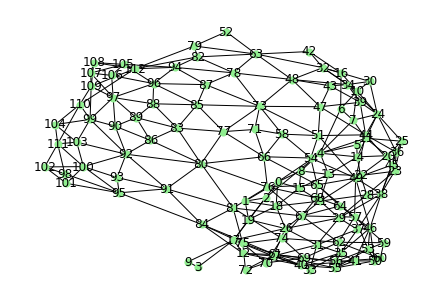

In [43]:
nx.draw(G, with_labels=True, node_size=50, node_color='lightgreen')

In [3]:
adata = ad.read_h5ad(snakemake.input[0])

x_coord = adata.X[:,-2]
y_coord = adata.X[:,-1]
mat = np.column_stack((x_coord, y_coord))

kd = libpysal.cg.KDTree(mat)

wnn = libpysal.weights.KNN(kd, 3)

knn_graph = wnn.to_networkx()

nx.write_gpickle(knn_graph, snakemake.output[0])

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


In [4]:
df = pd.read_csv(snakemake.input[1])
cell_type = {}
for i,ty in zip(df.id,df.type):
    cell_type.update({i: ty})

In [5]:
type_series = pd.Series(df.type, dtype = "category")

In [6]:
cell_type_list = type_series.cat.categories.to_list()

In [7]:
cell_type_dict = {}
for typ in cell_type_list:
    cell_type_dict.update({typ:[]})
    

In [8]:
for typ in cell_type_dict.keys():
    for n in range(len(x_coord)):
        typ_occurance = 0
        for key in knn_graph[n].keys():
            try:
                if cell_type[key+1] == typ:
                    typ_occurance = typ_occurance + 1
                else:
                    pass
                
            except:
                typ_occurance = 0
                
        cell_type_dict[typ].append(typ_occurance)
        
        
    
    

In [9]:
neighhorhood_occurance = []
for n in range(len(x_coord)):
    pvalb_occurance = 0
    for key in knn_graph[n].keys():
        try:
            if cell_type[key-1] == 'Astrocytes':
                pvalb_occurance = pvalb_occurance + 1
            else:
                pass
                
        except:
            pvalb_occurance = 0
    
             
    neighhorhood_occurance.append(pvalb_occurance)

In [10]:
knn_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112))